In [61]:
#Import des librairies et modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.dates import DateFormatter
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
print("Setup Complete")

Setup Complete


# 1. Exploration des données

In [2]:
#Chemin du fichier des ventes
year_2019_sales_filepath = 'https://raw.githubusercontent.com/murpi/wilddata/master/test/history.csv'

year_2019_sales_data = pd.read_csv(year_2019_sales_filepath, index_col = 'DATE', parse_dates = True)


In [3]:
#On verifie si les 5 premieres lignes correspondent bien au tableau
year_2019_sales_data.head()

,ITEM,SALES
DATE,,
2019-02-01,A,113
2019-03-01,A,143
2019-04-01,A,145
2019-05-01,A,167
2019-06-01,A,202


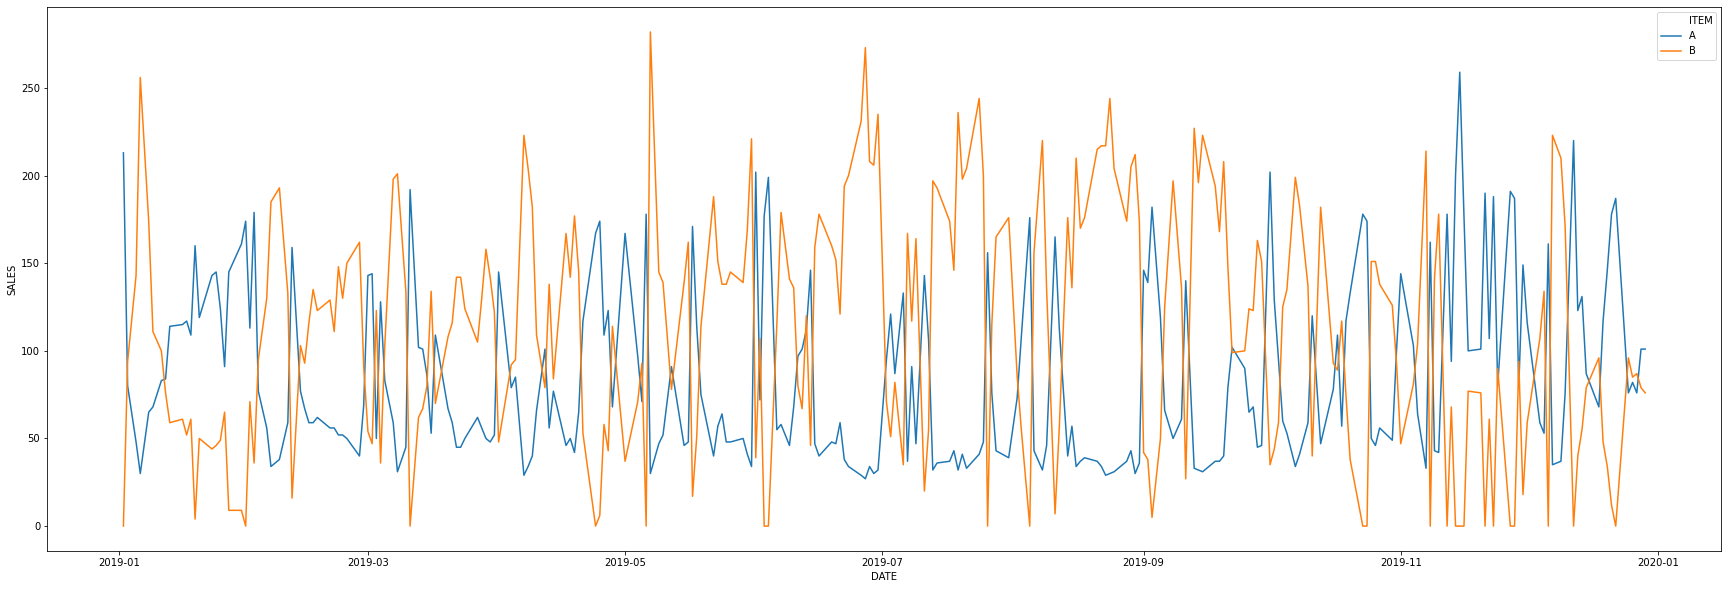

In [4]:
#Graphe des ventes des Items A et B sur toute l'année 2019
plt.figure(figsize=(30, 10))
sns.lineplot(data = year_2019_sales_data, x = year_2019_sales_data.index, y = 'SALES', hue = 'ITEM')


#select the most appropriate plot fct ( barplot, scatterplot, lineplot)
#on constate sur le graphe lineplot que les ventes des prdts A et B sont complémentaires.

In [5]:
#On relève des données utiles à partir du graphique
print('Moyenne:',np.mean(year_2019_sales_data['SALES']))
print('Mediane:',np.median(year_2019_sales_data['SALES']))
print('Ecart-type:',np.std(year_2019_sales_data['SALES']))
print('Variance:',np.var(year_2019_sales_data['SALES']))

Moyenne: 98.20769230769231
Mediane: 87.0
Ecart-type: 61.38559667617428
Variance: 3768.191479289939


# 2. Impact météo sur les ventes

In [6]:
#fichier météo Bordeaux 2019
bordeaux_meteo_filepath = 'https://raw.githubusercontent.com/murpi/wilddata/master/test/bordeaux2019.csv'
bordeaux_meteo = pd.read_csv(bordeaux_meteo_filepath, skiprows = 3, index_col = 'DATE', parse_dates = True)

#fichier météo Lille 2019
lille_meteo_filepath = 'https://raw.githubusercontent.com/murpi/wilddata/master/test/lille2019.csv'
lille_meteo = pd.read_csv(lille_meteo_filepath, skiprows = 3, index_col ='DATE', parse_dates = True)

#fichier météo Lyon 2019
lyon_meteo_filepath = 'https://raw.githubusercontent.com/murpi/wilddata/master/test/lyon2019.csv'
lyon_meteo = pd.read_csv(lyon_meteo_filepath, skiprows= 3, index_col = 'DATE', parse_dates = True)

#fichier météo Marseille 2019
marseille_meteo_filepath = 'https://raw.githubusercontent.com/murpi/wilddata/master/test/marseille2019.csv'
marseille_meteo = pd.read_csv(marseille_meteo_filepath, skiprows = 3, index_col = 'DATE', parse_dates = True)

In [7]:
#On verifie si les 5 premieres lignes correspondent bien au tableau
bordeaux_meteo.head()

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,...,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
DATE,,,,,,,,,,,,,,,,,,,,,
2019-01-01,9,2,8,2,7,7,0.0,95,6.5,1036,...,9,5,1,143,116,116,0,1,6.9,météo très défavorable
2019-01-02,9,4,14,5,7,6,0.0,92,9.0,1038,...,9,3,2,122,116,116,0,1,8.7,météo très défavorable
2019-01-03,7,2,15,1,5,5,0.0,72,10.0,1037,...,7,0,-2,116,116,116,0,1,8.7,météo très défavorable
2019-01-04,7,1,13,0,5,5,0.0,65,10.0,1037,...,7,0,-3,113,116,122,0,1,5.1,météo très défavorable
2019-01-05,6,1,9,0,4,4,0.0,81,10.0,1039,...,6,0,-1,116,116,116,0,1,8.7,météo très défavorable


In [8]:
#On concatene les fichiers météo au fichier des ventes, et on supprime les lignes avec des données manquantes
data_sales_x_bordeaux = year_2019_sales_data.merge(bordeaux_meteo, how='inner', left_index=True, right_index=True)
data_sales_x_lille = year_2019_sales_data.merge(lille_meteo, how='inner', left_index=True, right_index=True)
data_sales_x_lyon = year_2019_sales_data.merge(lyon_meteo, how='inner', left_index=True, right_index=True)
data_sales_x_marseille = year_2019_sales_data.merge(marseille_meteo, how='inner', left_index=True, right_index=True)

In [9]:
#On verifie pour Bordeaux si les 5 premieres lignes correspondent bien au tableau 
data_sales_x_bordeaux.head()

,ITEM,SALES,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,...,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
DATE,,,,,,,,,,,,,,,,,,,,,
2019-01-02,A,213,9,4,14,5,7,6,0.0,92,...,9,3,2,122,116,116,0,1,8.7,météo très défavorable
2019-01-02,B,0,9,4,14,5,7,6,0.0,92,...,9,3,2,122,116,116,0,1,8.7,météo très défavorable
2019-01-03,A,80,7,2,15,1,5,5,0.0,72,...,7,0,-2,116,116,116,0,1,8.7,météo très défavorable
2019-01-03,B,94,7,2,15,1,5,5,0.0,72,...,7,0,-2,116,116,116,0,1,8.7,météo très défavorable
2019-01-05,A,48,6,1,9,0,4,4,0.0,81,...,6,0,-1,116,116,116,0,1,8.7,météo très défavorable


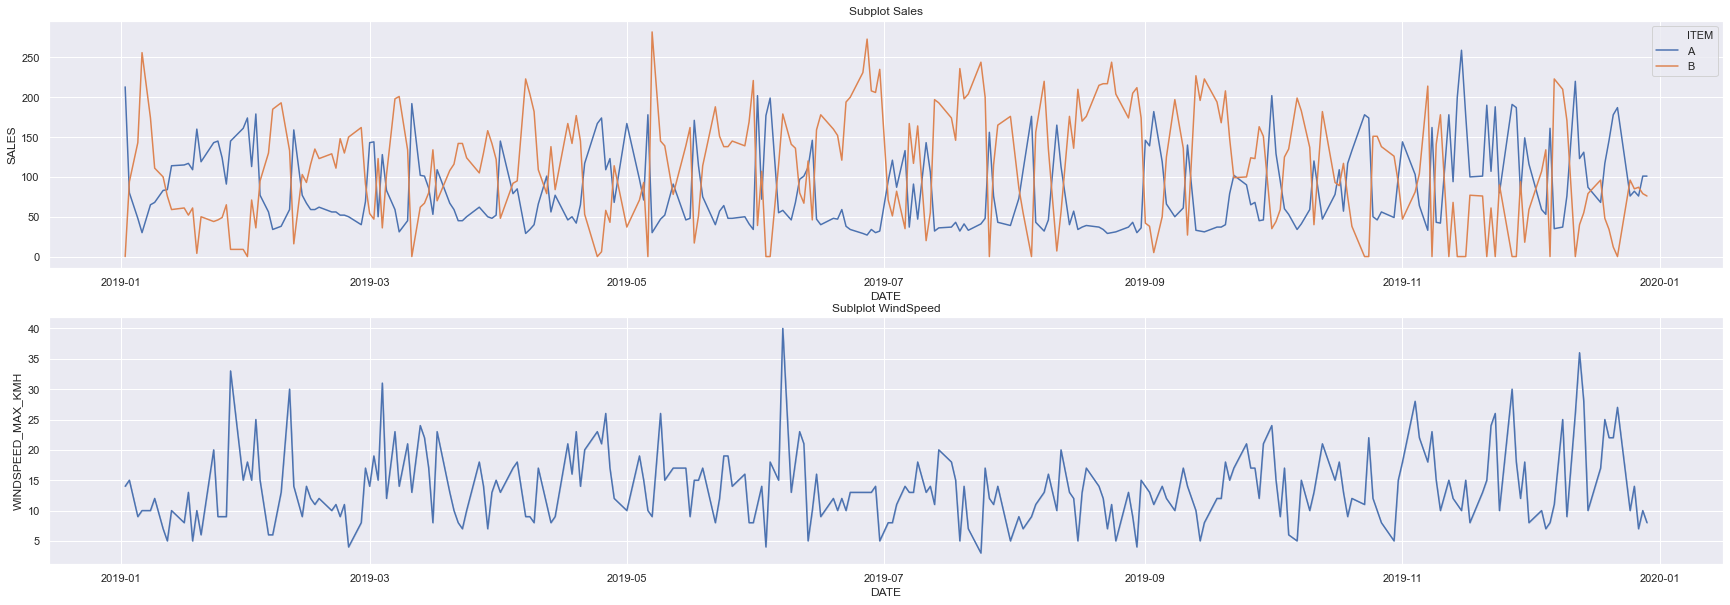

In [10]:
sns.set()
plt.figure(figsize=(30, 10))
plt.subplot(211)
plt.title('Subplot Sales')
sns.lineplot(data = data_sales_x_bordeaux, x = data_sales_x_bordeaux.index, y = 'SALES', hue = 'ITEM')

plt.subplot(212)
plt.title('Sublplot WindSpeed')
sns.lineplot(data = data_sales_x_bordeaux, x = data_sales_x_bordeaux.index, y = 'WINDSPEED_MAX_KMH')

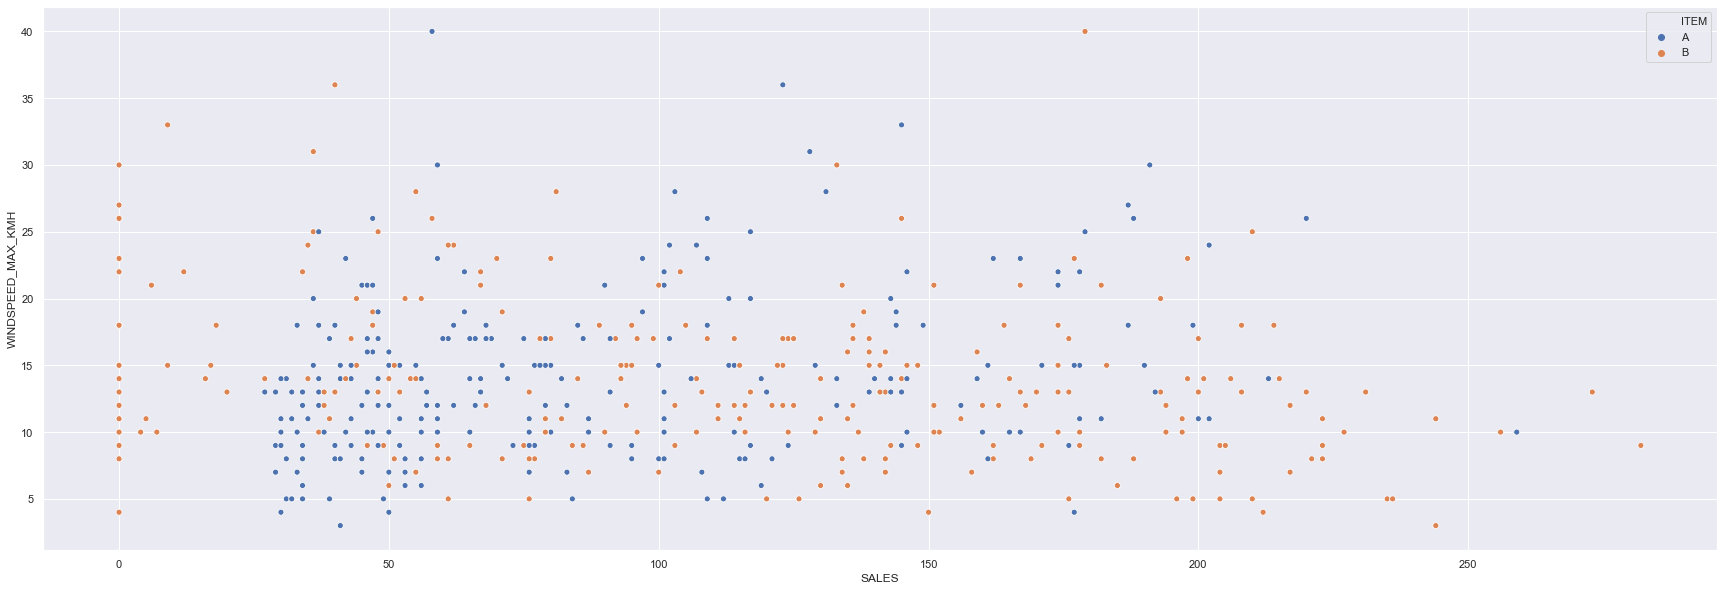

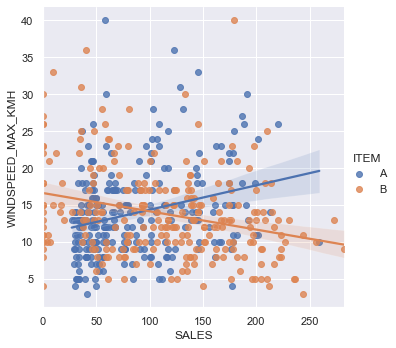

In [11]:
#On visualise deux droites de régréssion linéaires, cela nous permet de comprendre le lien ou l'impact
#du vent par rapport aux ventes selon la région
plt.figure(figsize = (30,10))
sns.scatterplot(x = 'SALES', y = 'WINDSPEED_MAX_KMH', hue = 'ITEM', data = data_sales_x_bordeaux)
sns.lmplot(x = 'SALES', y = 'WINDSPEED_MAX_KMH', hue = 'ITEM', data = data_sales_x_bordeaux)

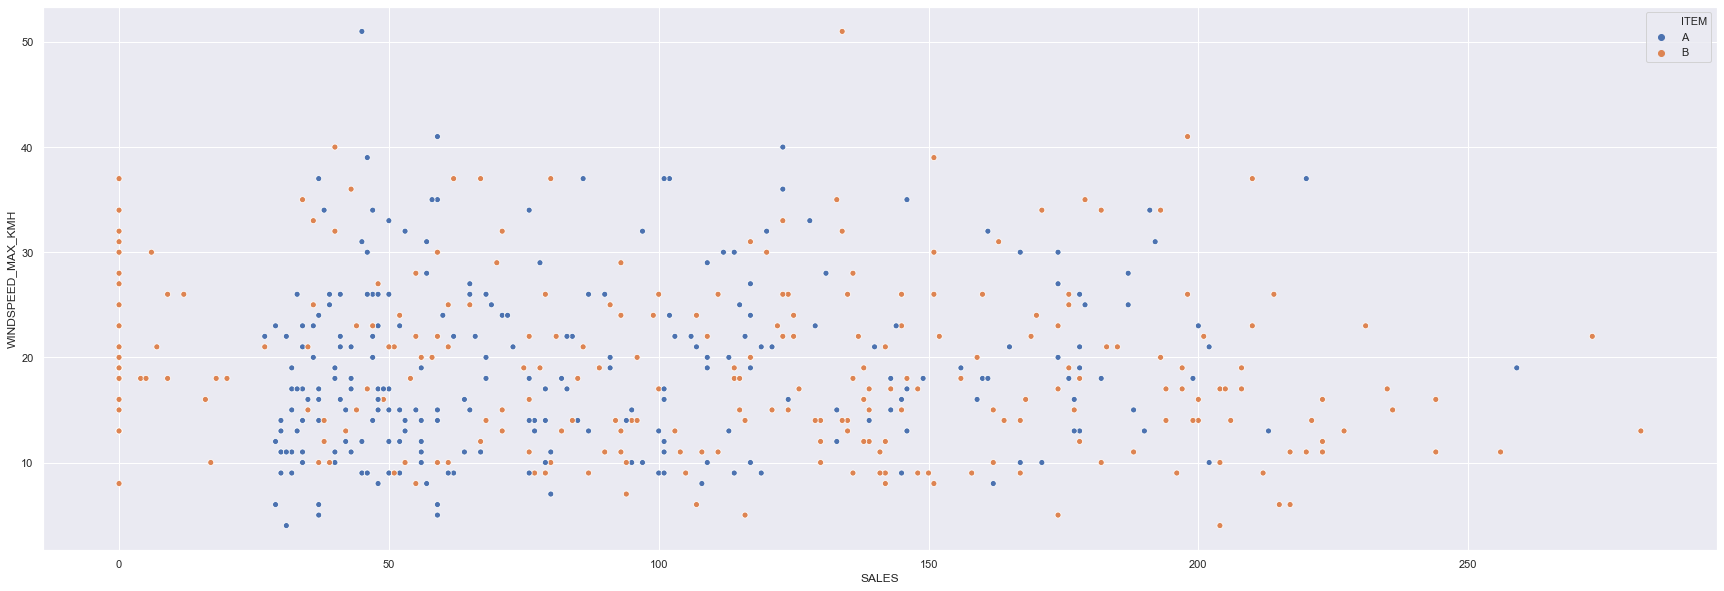

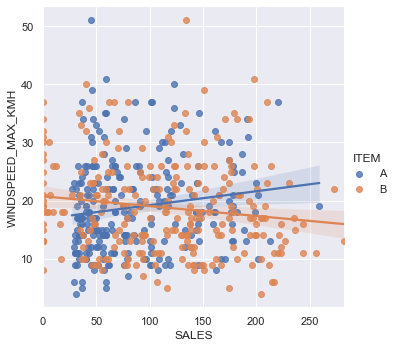

In [12]:
plt.figure(figsize = (30,10))
sns.scatterplot(x = 'SALES', y = 'WINDSPEED_MAX_KMH', hue = 'ITEM', data = data_sales_x_lille)
sns.lmplot(x = 'SALES', y = 'WINDSPEED_MAX_KMH', hue = 'ITEM', data = data_sales_x_lille)

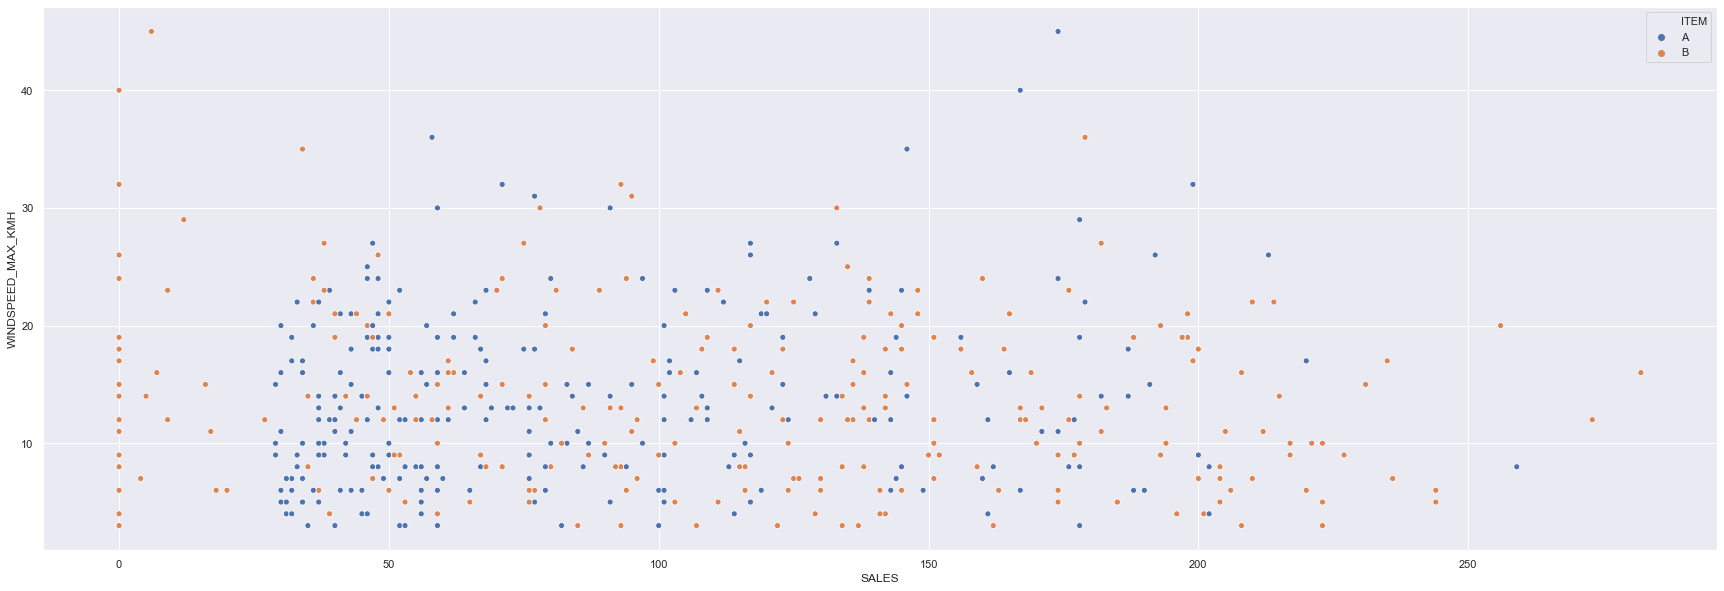

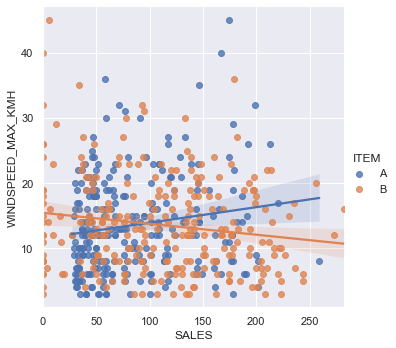

In [13]:
plt.figure(figsize = (30,10))
sns.scatterplot(x = 'SALES', y = 'WINDSPEED_MAX_KMH', hue = 'ITEM', data = data_sales_x_lyon)
sns.lmplot(x = 'SALES', y = 'WINDSPEED_MAX_KMH', hue = 'ITEM', data = data_sales_x_lyon)

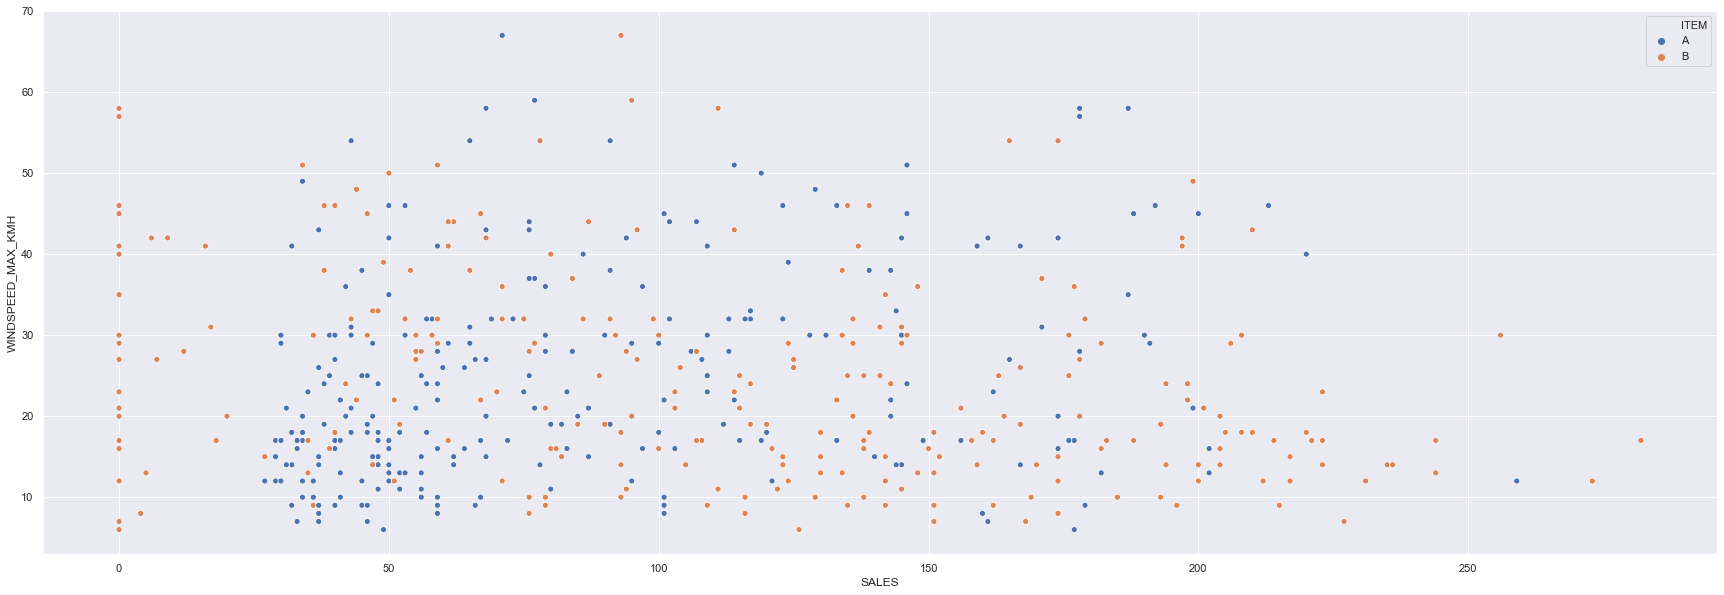

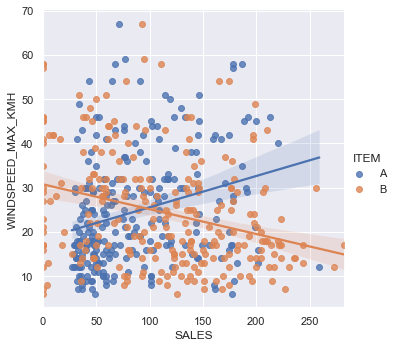

In [14]:
plt.figure(figsize = (30,10))
sns.scatterplot(x = 'SALES', y = 'WINDSPEED_MAX_KMH', hue = 'ITEM', data = data_sales_x_marseille)
sns.lmplot(x = 'SALES', y = 'WINDSPEED_MAX_KMH', hue = 'ITEM', data = data_sales_x_marseille)
#On constate que le coefficient de regression linéaire est bien plus significatif lorsqu'on compare les ventes
#à la météo ( Windspeed max) de Marseille

# 3. Trouver la boutique corespondant au fichier de ventes

In [22]:
data_item_a_marseille = data_sales_x_marseille[data_sales_x_marseille['ITEM'] == 'A']
data_item_a_lyon = data_sales_x_lyon[data_sales_x_lyon['ITEM'] == 'A']
data_item_a_lille = data_sales_x_lille[data_sales_x_lille['ITEM'] == 'A']
data_item_a_bordeaux = data_sales_x_bordeaux[data_sales_x_bordeaux['ITEM'] == 'A']

In [26]:
#On verifie qu'on a bien que les items A
data_item_a_bordeaux.tail()

,ITEM,SALES,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,...,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
DATE,,,,,,,,,,,,,,,,,,,,,
2019-12-25,A,76,13,11,10,11,13,11,0.0,95,...,13,11,10,143,143,116,0,1,8.7,météo correcte
2019-12-26,A,82,13,11,14,11,13,11,0.4,85,...,13,9,10,119,116,176,0,1,6.9,météo correcte
2019-12-27,A,76,13,9,7,8,11,12,0.0,93,...,13,9,8,116,116,116,0,1,8.7,météo correcte
2019-12-28,A,101,10,7,10,8,9,9,0.0,90,...,10,8,6,143,116,122,0,1,6.9,météo défavorable
2019-12-29,A,101,10,5,8,6,8,8,0.0,87,...,10,6,4,116,116,122,0,1,6.9,météo très défavorable


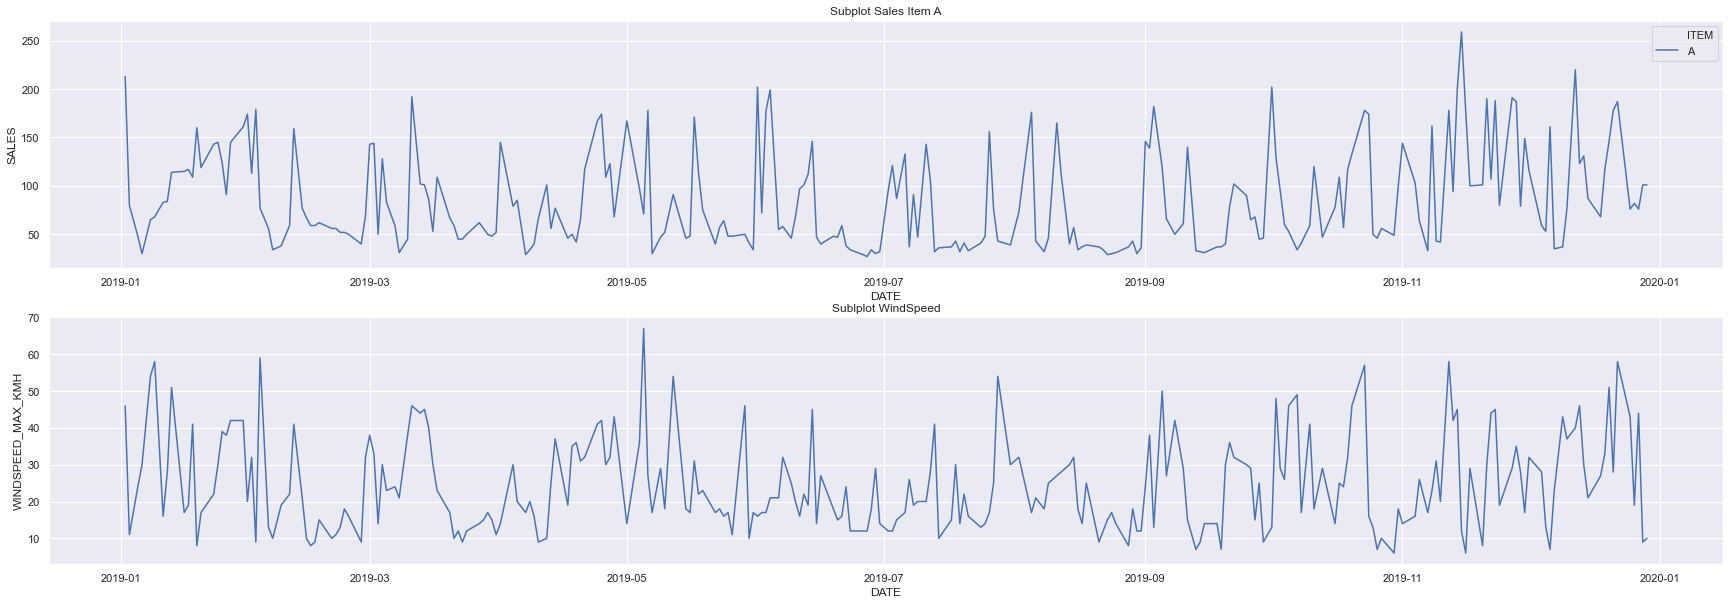

In [35]:
#On fait fait figurer les ventes dans un 1er subplot et la vitesse du vent dans un 2nd subplot.
sns.set()
plt.figure(figsize=(30, 10))
plt.subplot(211)
plt.title('Subplot Sales Item A')
sns.lineplot(data = data_item_a_marseille, x = data_item_a_marseille.index, y = 'SALES', hue = 'ITEM')

plt.subplot(212)
plt.title('Sublplot WindSpeed')
sns.lineplot(data = data_item_a_marseille, x = data_item_a_marseille.index, y = 'WINDSPEED_MAX_KMH' )

In [32]:
#On calcule le coefficient de Pearson pour savoir s'il y a une corrélation entre els variables 'SALES ' et 'WINDSPEED_MAX_KMH'
#Les coeffecients sont tous compris entre -1 et 1, mais graphiquement, on observe bien une correlation
#entre la météo de Marseille et la vente des produits A

coeff_pearson_marseille,_ = (pearsonr(data_item_a_marseille['SALES'], data_item_a_marseille['WINDSPEED_MAX_KMH']))
print("coefficient de Pearson Marseille = {}".format(coeff_pearson_marseille))

coeff_pearson_lille,_ = (pearsonr(data_item_a_lille['SALES'], data_item_a_lille['WINDSPEED_MAX_KMH']))
print("coefficient de Pearson Lille = {}".format(coeff_pearson_lille))

coeff_pearson_lyon,_ = (pearsonr(data_item_a_lyon['SALES'], data_item_a_lyon['WINDSPEED_MAX_KMH']))
print("coefficient de Pearson Lyon = {}".format(coeff_pearson_lyon))

coeff_pearson_bordeaux,_ = (pearsonr(data_item_a_bordeaux['SALES'], data_item_a_bordeaux['WINDSPEED_MAX_KMH']))
print("coefficient de Pearson Bordeaux = {}".format(coeff_pearson_bordeaux))

coefficient de Pearson Marseille = 0.27899385211570027
coefficient de Pearson Lille = 0.1491423961059185
coefficient de Pearson Lyon = 0.16274232747994768
coefficient de Pearson Bordeaux = 0.27375880950920894


# 4. Prevision de ventes pour Marseille

In [38]:
#fichier meteo prevision de ventes
prevision_filepath = 'https://raw.githubusercontent.com/murpi/wilddata/master/test/forecast.csv'
prevision_data = pd.read_csv(prevision_filepath, index_col = 'DATE', parse_dates = True)

In [39]:
prevision_data.head()

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT
DATE,,,,,,,,
2021-06-21,20,14,23,2.0,92,7.0,1025,61.0
2021-06-22,25,17,10,0.0,73,9.0,1027,26.0
2021-06-23,25,18,19,0.0,79,10.0,1024,19.0
2021-06-24,32,23,12,0.0,76,10.0,1018,2.0
2021-06-25,28,20,13,1.0,82,10.0,1015,36.0


# 4.1 Prevision item A

In [95]:
#On établit les prévisions pour l'item A
#On separe la cible des colonnes qui vont nous permettre de prédire la colonne Sales
y = data_item_a_marseille.SALES
X = data_item_a_marseille.drop(['SALES'], axis = 1)

#On divise les données en subset d'entrainement et de validation
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0)

#On selectionne les variables quantitatives présentes dans l'echantillon de données 'prevision_data'.
cols = ['MAX_TEMPERATURE_C','MIN_TEMPERATURE_C','WINDSPEED_MAX_KMH','PRECIP_TOTAL_DAY_MM','HUMIDITY_MAX_PERCENT','VISIBILITY_AVG_KM','PRESSURE_MAX_MB','CLOUDCOVER_AVG_PERCENT']

#On garde les colonnes choisies au dessus 
X_train = X_train_full[cols].copy()
X_valid = X_valid_full[cols].copy()

In [86]:
#On verifie qu'on a bien les colonnes choisies ci-dessus
X_train.head()

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT
DATE,,,,,,,,,,,
2019-06-23,25,24,12,23,24,24,0.0,62,10.0,1016,6.125
2019-09-15,27,25,14,24,27,24,0.0,60,10.0,1025,7.375
2019-04-14,15,11,37,10,13,14,0.0,35,10.0,1016,11.625
2019-10-02,23,20,48,19,22,22,1.7,59,10.0,1010,26.125
2019-09-22,24,22,32,21,23,23,13.3,76,9.0,1015,76.375


In [97]:
#On définit le modèle de prédiction
#item_a_model = DecisionTreeRegressor()
item_a_model = RandomForestRegressor()
item_a_model.fit(X_train,y_train)

RandomForestRegressor()

In [98]:
item_a_predictions = item_a_model.predict(X_valid)

In [99]:
print(mean_absolute_error(y_valid, item_a_predictions))

42.33403846153847


In [103]:
item_a_result = item_a_model.predict(prevision_data)
print(item_a_result)

[ 88.71  74.83  71.99  72.65  95.33 106.56 112.05]


In [104]:
#Bernardo doit commander 623 item A pour la derniere semaine de juin.
sum(item_a_result)

622.1199999999999

# 4.2 Prevision item B

In [105]:
#On établit les prévisions pour l'item B
#On separe la cible des colonnes qui vont nous permettre de prédire la colonne Sales
data_item_b_marseille = data_sales_x_marseille[data_sales_x_marseille['ITEM'] == 'B']
y = data_item_b_marseille.SALES
X = data_item_b_marseille.drop(['SALES'], axis = 1)

#On divise les données en subset d'entrainement et de validation
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0)

#On selectionne les variables quantitatives présentes dans l'echantillon de données 'prevision_data'.
cols = ['MAX_TEMPERATURE_C','MIN_TEMPERATURE_C','WINDSPEED_MAX_KMH','PRECIP_TOTAL_DAY_MM','HUMIDITY_MAX_PERCENT','VISIBILITY_AVG_KM','PRESSURE_MAX_MB','CLOUDCOVER_AVG_PERCENT']

#On garde les colonnes choisies au dessus 
X_train = X_train_full[cols].copy()
X_valid = X_valid_full[cols].copy()

In [106]:
#On verifie qu'on a bien les colonnes choisies ci-dessus
X_train.head()

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT
DATE,,,,,,,,
2019-06-23,25,24,12,0.0,62,10.0,1016,6.125
2019-09-15,27,25,14,0.0,60,10.0,1025,7.375
2019-04-14,15,11,37,0.0,35,10.0,1016,11.625
2019-10-02,23,20,48,1.7,59,10.0,1010,26.125
2019-09-22,24,22,32,13.3,76,9.0,1015,76.375


In [107]:
#On définit le modèle de prédiction
#item_a_model = DecisionTreeRegressor()
item_b_model = RandomForestRegressor()
item_b_model.fit(X_train,y_train)

RandomForestRegressor()

In [109]:
item_b_predictions = item_b_model.predict(X_valid)

In [110]:
print(mean_absolute_error(y_valid, item_b_predictions))

50.81307692307692


In [111]:
item_b_result = item_b_model.predict(prevision_data)
print(item_b_result)

[102.86 144.07 148.84 114.25 113.47  78.85  60.66]


In [113]:
#Bernardo doit commander 763 item B pour la derniere semaine de juin.
sum(item_b_result)

763.0

Conclusion : 
Bernardo doit commander 623 item A pour la derniere semaine de juin, ( avec un MAE d'environ 42)
Bernardo doit commander 763 item B pour la derniere semaine de juin. (avec un MAE d'environ 50) 